# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

### Importing the libraries

In [113]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

# Displaying all Columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

%config InlineBackend.figure_format = 'retina'

### Loading The Data

In [114]:
# Reading the csv data file.

df = pd.read_csv('telecom_churn_data.csv')
df.to_pickle('init.pkl')

In [115]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [116]:
# checking the shape of the dataframe
df.shape

(99999, 226)

In [117]:
#Checking dataset information
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

This dataset has 99999 rows and 226 columns

In [118]:
# Describing the data to get the statistical analysis of numerical features/columns
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [119]:
# Check the number of unique values in each column and drop the columns with only one count (no information)

columns_to_drop = []
for column in df.columns:
    if df[column].nunique() == 1:
        columns_to_drop.append(column)
print("dropping these columns", columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

dropping these columns ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [120]:
df.shape

(99999, 210)

### Handling Missing Values

In [121]:
# Check overall missing info
(df.isnull().mean()*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

Although there are lot of columns with high missing values, it may be genuinely they are missing due customers have not recharged or so, hence we cannot straignway drop those columns as they could be importrant ones for predictions. Checking for such related columns

In [122]:
#checking for columns with '6' month for now
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [123]:
#checking for columns with '7' month for now
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(20)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN


From the above result two results it is observed that the recharge date and the recharge value are missing together which means the customer didn't recharge

Imputing columns with meaningfull missing values(as customers didn't recharge) '0' for retaining them

In [124]:
# Code for conditional imputation

for month in [6, 7, 8, 9]:
    df.loc[pd.isnull(df[f"date_of_last_rech_data_{month}"]), f"total_rech_data_{month}"] = 0
    df.loc[pd.isnull(df[f"date_of_last_rech_data_{month}"]), f"max_rech_data_{month}"] = 0
    df.loc[pd.isnull(df[f"date_of_last_rech_data_{month}"]), f"av_rech_amt_data_{month}"] = 0

In [125]:
# running the previous code for month 7v to check if the missing values were imputed correctly
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(20)

,total_rech_data_7,date_of_last_rech_data_7


In [126]:
df.total_rech_data_7.value_counts()

0.0     74428
1.0     12796
2.0     5238 
3.0     2059 
4.0     1476 
5.0     997  
6.0     756  
7.0     520  
8.0     435  
10.0    275  
9.0     275  
11.0    201  
12.0    164  
13.0    72   
14.0    66   
15.0    47   
16.0    41   
17.0    23   
19.0    21   
20.0    17   
18.0    15   
24.0    12   
21.0    10   
22.0    9    
23.0    7    
26.0    6    
25.0    5    
31.0    3    
35.0    3    
30.0    3    
32.0    2    
40.0    2    
43.0    2    
27.0    2    
48.0    2    
29.0    2    
39.0    1    
44.0    1    
42.0    1    
50.0    1    
34.0    1    
37.0    1    
54.0    1    
Name: total_rech_data_7, dtype: int64

In [127]:
#Checking for missing values in all the columns. Printing the columns with more than 40% of missing values

cut_off = 40
cols_to_drop = list(df.columns[100*df.isnull().mean()>cut_off])

print(cols_to_drop)
print(len(cols_to_drop))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
28


There are 32 columns which has missing values more than 40%

Checking for few categorical columns which has missing or 'NaN' values

In [128]:
df.night_pck_user_7.isnull().sum()

74428

In [129]:
df.night_pck_user_6.isnull().sum()

74846

In [130]:
# replace missing values with '-1' in categorical columns

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [131]:
df.night_pck_user_6.value_counts()

-1.0    74846
 0.0    24522
 1.0    631  
Name: night_pck_user_6, dtype: int64

In [132]:
#Checking for missing values in all the columns. Printing the columns with more than 40% of missing values

cut_off = 40
cols_to_drop = list(df.columns[100*df.isnull().mean()>cut_off])

print(cols_to_drop)
print(len(cols_to_drop))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
20


In [133]:
#Removing those 20 columns which have more than 40% of missing values

df.drop(cols_to_drop,axis=1, inplace = True)

In [134]:
#checking the shape of the date set again after dropping columns
df.shape

(99999, 190)

Dropping Date and ID columns as they don't add much value to the analysis and prediction.

In [135]:
# Listing and dropping the date columns
date_columns = [col for col in df.columns if 'date' in col]
print("dropping date columns: ", date_columns)

df.drop(columns=date_columns, inplace=True)

dropping date columns:  ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [136]:
#dropping id columns
if 'circle_id' in df.columns:
    df.drop(columns=['circle_id'], inplace=True)
if 'mobile_number' in df.columns:
    df.drop(columns=['mobile_number'], inplace=True)



In [137]:
#Checking the shape of the data again
df.shape

(99999, 185)

In [138]:
# Check overall missing info
(df.isnull().mean()*100).round(2).sort_values(ascending=False)

loc_ic_mou_9          7.75
loc_og_mou_9          7.75
std_ic_t2t_mou_9      7.75
loc_og_t2m_mou_9      7.75
loc_ic_t2t_mou_9      7.75
spl_ic_mou_9          7.75
std_ic_t2f_mou_9      7.75
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
std_ic_t2m_mou_9      7.75
loc_ic_t2m_mou_9      7.75
std_og_t2t_mou_9      7.75
og_others_9           7.75
std_ic_mou_9          7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_mou_9          7.75
spl_og_mou_9          7.75
loc_og_t2t_mou_9      7.75
isd_og_mou_9          7.75
roam_og_mou_9         7.75
roam_ic_mou_9         7.75
loc_ic_t2f_mou_9      7.75
onnet_mou_9           7.75
offnet_mou_9          7.75
isd_ic_mou_9          7.75
ic_others_9           7.75
std_og_mou_8          5.38
std_ic_t2f_mou_8      5.38
ic_others_8           5.38
loc_ic_mou_8          5.38
loc_ic_t2m_mou_8      5.38
std_og_t2f_mou_8      5.38
std_ic_mou_8          5.38
og_others_8           5.38
std_og_t2m_mou_8      5.38
onnet_mou_8           5.38
s

In [139]:
df.shape

(99999, 185)

# Filtering high-value customers



Calculating only for June and July which is considered as good phase

In [140]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [141]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [142]:
# calculate average recharge done by customer in good phase
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [143]:
# Considering the 70th percentile recharge amount as threshold for high valued customers
threshold = df['av_amt_data_6_7'].quantile(0.7)
threshold

478.0

In [144]:
# filtering the high valued customers
df = df[df['av_amt_data_6_7'] >= threshold]
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN

In [145]:
#Checking the shape of the size with high valued customers
df.shape


(30001, 190)

The dataset of high valued customers have around 30001 records

In [146]:
# delete variables created to filter high-value customers
df = df.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df.shape

(30001, 185)

In [147]:
df.to_pickle('filtered_high_value.pkl')

## Tagging churners and deriving a 'Churn' attribute


Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [148]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [149]:
df['churn'].mean()

0.08136395453484883

In [150]:
# print churn ratio
print("Churn Ratio:")
print(df.churn.value_counts()*100/df.shape[0])

Churn Ratio:
0    91.863605
1    8.136395 
Name: churn, dtype: float64


### Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [151]:
# Find the columns for churn month(9)
col_9 = [col for col in df.columns if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [152]:
# Delete the churn month columns
df = df.drop(columns=col_9)

In [153]:
df.shape

(30001, 141)

## Outliers treatment


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 141 entries, arpu_6 to churn
dtypes: float64(115), int64(26)
memory usage: 32.5 MB


In [157]:
# Find the numeric columns
numeric_cols = list(df.select_dtypes(exclude=['object']).columns)
print(numeric_cols)
if 'chu' in numeric_cols:
    numeric_cols.remove('chu')

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [158]:
# Removing extreme outliers
for col in numeric_cols: 
    q1 = df[col].quantile(0.01)
    q3 = df[col].quantile(0.99)
    iqr = q3 - q1
    range_low  = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    
    # Assigning the filtered dataset into data
    df = df.loc[pd.isna(df[col]) | ((df[col] >= range_low) & (df[col] <= range_high))]

df.shape

(26913, 141)

In [ ]:
df.to_pickle('outliers_removed.pkl')

## EDA

### Deriving new calculated features for easy analysis


In [ ]:
# Find columns of total mou, rech_num and rech_amt
total_cols = [total for total in df.columns if 'total' in total]
total_cols

#### Deriving new column decrease_mou_action

In [ ]:
# Total MOU at good phase (incoming and outgoing)
df['total_mou_good'] = (df['total_og_mou_6'] + df['total_ic_mou_6'] + df['total_og_mou_7'] + df['total_ic_mou_7'])/


In [ ]:
# Avg. MOU at action phase
# Taking average because two months(7 and 8) are in action phase
df['avg_mou_action'] = (df['total_og_mou_7'] + df['total_og_mou_8'] + df['total_ic_mou_7'] + df['total_ic_mou_8'])/2

In [ ]:
# Difference avg_mou_good and avg_mou_action
df['diff_mou'] = df['avg_mou_action'] - df['total_mou_good']

In [ ]:
# Checking whether the mou has decreased in action phase
df['decrease_mou_action'] = np.where((df['diff_mou'] < 0), 1, 0)

In [ ]:
df[['churn', 'decrease_mou_action']].pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn Rate')
plt.show()


## Deriving new column decrease_rech_num_action


In [ ]:
df['avg_rech_num_action'] = (df['total_rech_num_7'] + df['total_rech_num_8'])/2
df['diff_rech_num'] = df['avg_rech_num_action'] - df['total_rech_num_6']
df['decrease_rech_num_action'] = np.where((df['diff_rech_num'] < 0), 1, 0)
df.head()


## Deriving new column decrease_rech_amt_action


In [ ]:
df['avg_rech_amt_action'] = (df['total_rech_amt_7'] + df['total_rech_amt_8'])/2
df['diff_rech_amt'] = df['avg_rech_amt_action'] - df['total_rech_amt_6']
df['decrease_rech_amt_action'] = np.where((df['diff_rech_amt'] < 0), 1, 0) 
df.head()


## Deriving new column decrease_arpu_action


In [ ]:
df['avg_arpu_action'] = (df['arpu_7'] + df['arpu_8'])/2
df['diff_arpu'] = df['avg_arpu_action'] - df['arpu_6']
df['decrease_arpu_action'] = np.where(df['diff_arpu'] < 0, 1, 0)
df.head()

## Deriving new column decrease_vbc_action

In [ ]:
df['avg_vbc_3g_action'] = (df['jul_vbc_3g'] + df['aug_vbc_3g'])/2
df['diff_vbc'] = df['avg_vbc_3g_action'] - df['jun_vbc_3g']
df['decrease_vbc_action'] = np.where(df['diff_vbc'] < 0 , 1, 0)
df.head()

In [ ]:
df.to_pickle("deriving_new_columns.pkl")

# EDA 

## Univariate analysis


In [ ]:
#Plot the pie chart for the Churn variable
print("Churn Ratio:")
print(df.churn.value_counts()*100/df.shape[0])
df.churn.value_counts(normalize=True).plot.pie()
plt.show()

From above chart, we can see that 91% of the customers do not churn, there is a possibility of class imbalance


In [ ]:
sns.distplot(df['arpu_6'])

In [ ]:
df[['churn', 'decrease_mou_action']].pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn Rate')
plt.show()

Here, we observe that the churn rate is more for the customers whose MOU decreased in the action phase than the good phase.

In [ ]:
df.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn Rate')
plt.show()

Again, the churn rate is more for the customers, whose number of recharge in the action phase is less than in good phase.


In [ ]:
df.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn Rate')
plt.show()

again we observe that the churn rate is more for the customers whose amount of recharge in the action phase is less than the amount in good phase.

### ARPU

In [ ]:
data_churn = df[df['churn'] == 1]
data_not_churn = df[df['churn'] == 0]

ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_not_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='ARPU in action phase')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

## Bivariate analysis

In [ ]:
df.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn Rate')
plt.show()

The churn rate is more for the customers, whose recharge amount and number of recharge have decreased in the action phase as compare to the the good phase.

In [ ]:
df.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(df, x='avg_rech_num_action',y='avg_rech_amt_action', hue='churn')

Above pattern shows that the recharge number and the recharge amount are somewhat propotional.

# Modeling

## Data Preperation

### Train-Test Split

In [159]:
df.dropna(inplace=True)

In [165]:
df.shape

(25558, 141)

In [187]:
from sklearn.model_selection import train_test_split
X = df.drop(['churn'], axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [188]:
#checking the shape of the train and test sets
print(X.shape)
print(y.shape)

(25558, 140)
(25558,)


In [189]:
print('X train Shape:',X_train.shape)
print('X test Shape:',X_test.shape)
print('y train Shape:',y_train.shape)
print('y test Shape:',y_test.shape)

X train Shape: (20446, 140)
X test Shape: (5112, 140)
y train Shape: (20446,)
y test Shape: (5112,)


## Dealing with data imbalance


In [ ]:
#%pip install imblearn

In [161]:
#Importing the libraries for sampling the data
from imblearn import __version__
print(__version__)

0.12.2


In [191]:
df['churn'].mean(), len(df)

(0.055442522889114956, 25558)

We use oversampling because undersampling will reduce the size of dataset drastically because current ratio is only 6%

In [230]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=10)
X_train_smp, y_train_smp = sm.fit_resample(X_train, y_train)


In [231]:
y_train_smp.mean(), len(y_train_smp), len(X_train_smp)

(0.5, 38600, 38600)

In [194]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,319.352,267.899,441.074,25.86,18.54,14.58,164.06,95.31,143.84,0.0,0.0,0.0,0.0,0.0,0.0,25.86,18.54,14.58,158.66,92.59,143.84,0.68,0.36,0.00,0.00,0.0,0.00,185.21,111.51,158.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,4.71,2.35,0.00,0.00,0.0,0.0,189.93,113.86,158.43,32.31,8.93,2.53,167.81,115.79,167.08,2.71,1.48,2.23,202.84,126.21,171.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.54,126.21,180.53,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.00,8.68,7,10,9,327,315,549,152,145,154,0,25,50,3.0,6.0,6.0,152.0,145.0,154.0,329.0,270.0,399.0,372.35,19.08,23.11,0.00,966.17,1171.43,0.0,0.0,0.0,0,0,1,2,3,2,0,1,1,1,2,2,1.0,1.0,1.0,356,248.49,295.12,0.00,0.0
1,145.614,168.417,102.195,64.26,19.39,23.84,42.44,28.53,50.26,0.0,0.0,0.0,0.0,0.0,0.0,35.79,19.39,23.84,22.69,28.53,32.68,0.28,0.00,0.00,0.55,0.0,1.01,58.78,47.93,56.53,28.46,0.00,0.00,17.44,0.00,15.54,0.00,0.00,0.00,45.91,0.00,15.54,0.0,0.0,0.0,2.01,0.00,3.46,0.51,0.0,0.0,107.23,47.93,75.54,28.98,12.78,11.94,137.24,186.36,186.04,3.38,0.00,3.33,169.61,199.14,201.33,10.11,38.41,84.31,26.36,0.00,0.38,0.45,1.61,0.88,36.93,40.03,85.58,207.91,239.86,287.94,0.30,0.00,0.00,0.00,0.00,0.00,1.06,0.68,1.03,7,9,8,149,225,101,50,67,50,14,67,17,3.0,5.0,3.0,25.0,25.0,17.0,64.0,117.0,51.0,32.70,98.61,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,3,5,3,0,0,0,0,0,0,1.0,1.0,0.0,345,0.00,0.00,0.00,0.0
2,683.103,1322.366,918.940,228.93,495.16,519.11,243.06,304.21,290.43,0.0,0.0,0.0,0.0,0.0,0.0,228.93,495.16,519.11,227.66,235.18,252.33,3.01,2.58,11.69,0.00,0.0,0.00,459.61,732.93,783.14,0.00,0.00,0.00,12.38,64.34,22.23,0.00,0.00,4.16,12.38,64.34,26.39,0.0,0.0,0.0,0.00,2.10,0.00,0.00,0.0,0.0,471.99,799.38,809.54,295.71,279.23,207.16,278.64,344.91,235.71,3.78,7.61,8.46,578.14,631.76,451.34,0.00,0.00,0.43,36.14,30.41,12.09,0.36,2.76,0.81,36.51,33.18,13.34,616.43,664.94,464.69,0.00,0.00,0.00,1.76,0.00,0.00,0.00,0.00,0.00,8,10,9,902,1587,1422,252,300,252,150,300,250,1.0,2.0,1.0,252.0,25

## Feature Scaling


In [232]:
# Standardization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


columns_to_scale = list(X_train_smp.columns)



X_train_smp[columns_to_scale] = scaler.fit_transform(X_train_smp[columns_to_scale])

In [233]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
561,3.449295,2.853676,2.250897,-0.277693,-0.231613,-0.320611,0.591033,0.381076,0.434164,-0.265067,-0.281874,-0.324584,-0.292111,-0.327557,-0.374148,0.779403,0.895392,0.191901,2.913678,2.302393,1.787686,0.278272,1.241557,0.346475,-0.345595,-0.354919,-0.307645,2.447735,2.125964,1.374600,-0.522544,-0.503450,-0.377141,-0.530030,-0.470341,-0.394499,-0.180609,-0.186630,-0.165918,-0.739443,-0.678823,-0.511885,-0.119601,0.231282,1.137152,-0.498673,-0.548395,-0.440844,-0.415428,0.0,0.0,0.277491,0.165457,0.136976,0.689860,0.106951,-0.236967,0.525729,0.339357,0.500291,0.848620,0.703028,0.799144,0.762951,0.384547,0.375539,-0.407452,-0.403013,-0.314791,-0.488004,-0.425686,-0.303662,-0.227089,-0.232336,-0.205442,-0.589990,-0.533597,-0.383632,0.531384,0.191434,0.233159,-0.462783,-0.215257,-0.19377,-0.238820,-0.245605,-0.211405,-0.246394,-0.247517,-0.203623,0.830537,0.454590,0.503849,3.208734,2.333159,2.354354,-0.125475,0.037071,0.193077,0.347017,0.389158,0.804295,-0.596348,-0.236403,-0.047524,-0.649005,2.186195,2.519875,-0.644609,0.919567,1.261210,-0.388423,-0.333182,-0.018368,-0.385244,0.739413,2.318416,-0.985969,1.011198,1.235561,-0.301692,-0.312760,-0.277618,-0.431042,-0.441135,-0.362089,-0.273137,1.884235,2.070643,-0.224760,-0.233943,-0.187424,-0.980990,1.150464,1.423479,0.660802,3.663832,0.531156,2.876359,1.552115
25366,-0.670359,-0.263414,0.135570,-0.557068,-0.350402,-0.369682,-0.648850,-0.577259,-0.253662,-0.265067,-0.281874,-0.324584,-0.292111,-0.327557,-0.374148,-0.093125,0.509614,0.019809,-0.493719,-0.459881,-0.295216,0.146699,-0.232410,0.181823,-0.345595,-0.354919,-0.307645,-0.385765,-0.065459,-0.191946,-0.525775,-0.503450,-0.369421,-0.477064,-0.490111,-0.242641,3.245743,13.525662,15.254990,-0.682250,-0.617139,-0.305389,-0.119601,-0.132891,-0.122381,-0.498673,-0.548395,-0.440844,-0.415428,0.0,0.0,-0.826112,-0.628657,-0.360770,-0.126616,-0.060157,0.727533,-0.390682,-0.400862,0.177961,-0.329858,0.041139,-0.278943,-0.382250,-0.318562,0.36884

## PCA Model

In [234]:
from sklearn.decomposition import PCA

pca = PCA(random_state=100)

pca.fit(X_train_smp)

pca.components_


array([[-5.11124032e-02, -4.16235741e-02,  3.83603386e-02, ...,
         1.27483220e-01,  1.25079389e-01,  4.53240644e-02],
       [ 1.34534825e-01,  1.59749619e-01,  1.65117744e-01, ...,
        -5.59664536e-03, -8.35063815e-03,  4.24890783e-03],
       [ 8.75053183e-02,  1.52247879e-01,  1.61599322e-01, ...,
         1.23346999e-01,  1.17465003e-01,  3.47884944e-02],
       ...,
       [ 2.30745959e-07, -1.07884822e-07,  5.76207244e-08, ...,
        -3.20897353e-08,  9.57300891e-09,  2.98069764e-08],
       [ 0.00000000e+00,  8.07991580e-17, -2.00023302e-17, ...,
        -1.29295281e-16,  1.09652012e-16,  3.91177646e-17],
       [-0.00000000e+00, -1.23727129e-17, -2.54088602e-17, ...,
        -1.48806337e-16, -2.47693686e-16, -8.76662506e-18]])

In [199]:
variance_cumsum = np.cumsum(pca.explained_variance_ratio_) 
variance_cumsum

array([0.11998069, 0.23616535, 0.29357879, 0.34024354, 0.37720826,
       0.41077534, 0.44113563, 0.46780702, 0.49034184, 0.51122934,
       0.53093515, 0.55008936, 0.56754227, 0.58398486, 0.5999065 ,
       0.61519638, 0.62936318, 0.64281283, 0.65585255, 0.66741577,
       0.67811202, 0.6883426 , 0.69829222, 0.70789828, 0.71730481,
       0.72639136, 0.73499391, 0.74331407, 0.75151332, 0.75910638,
       0.76660976, 0.77378632, 0.78073677, 0.78750099, 0.79414173,
       0.80076485, 0.80725315, 0.8136419 , 0.81989942, 0.82592536,
       0.83186593, 0.83763912, 0.8432602 , 0.84869994, 0.85405879,
       0.85920902, 0.8643516 , 0.86928227, 0.87394851, 0.87847314,
       0.88296675, 0.88717782, 0.89122209, 0.89514873, 0.89895562,
       0.90272899, 0.90627431, 0.90973042, 0.91316331, 0.91654029,
       0.91985978, 0.92304179, 0.92619411, 0.92924219, 0.93228702,
       0.93521005, 0.9380499 , 0.94079553, 0.94341126, 0.94598844,
       0.94853782, 0.95100673, 0.95346066, 0.95583015, 0.95811

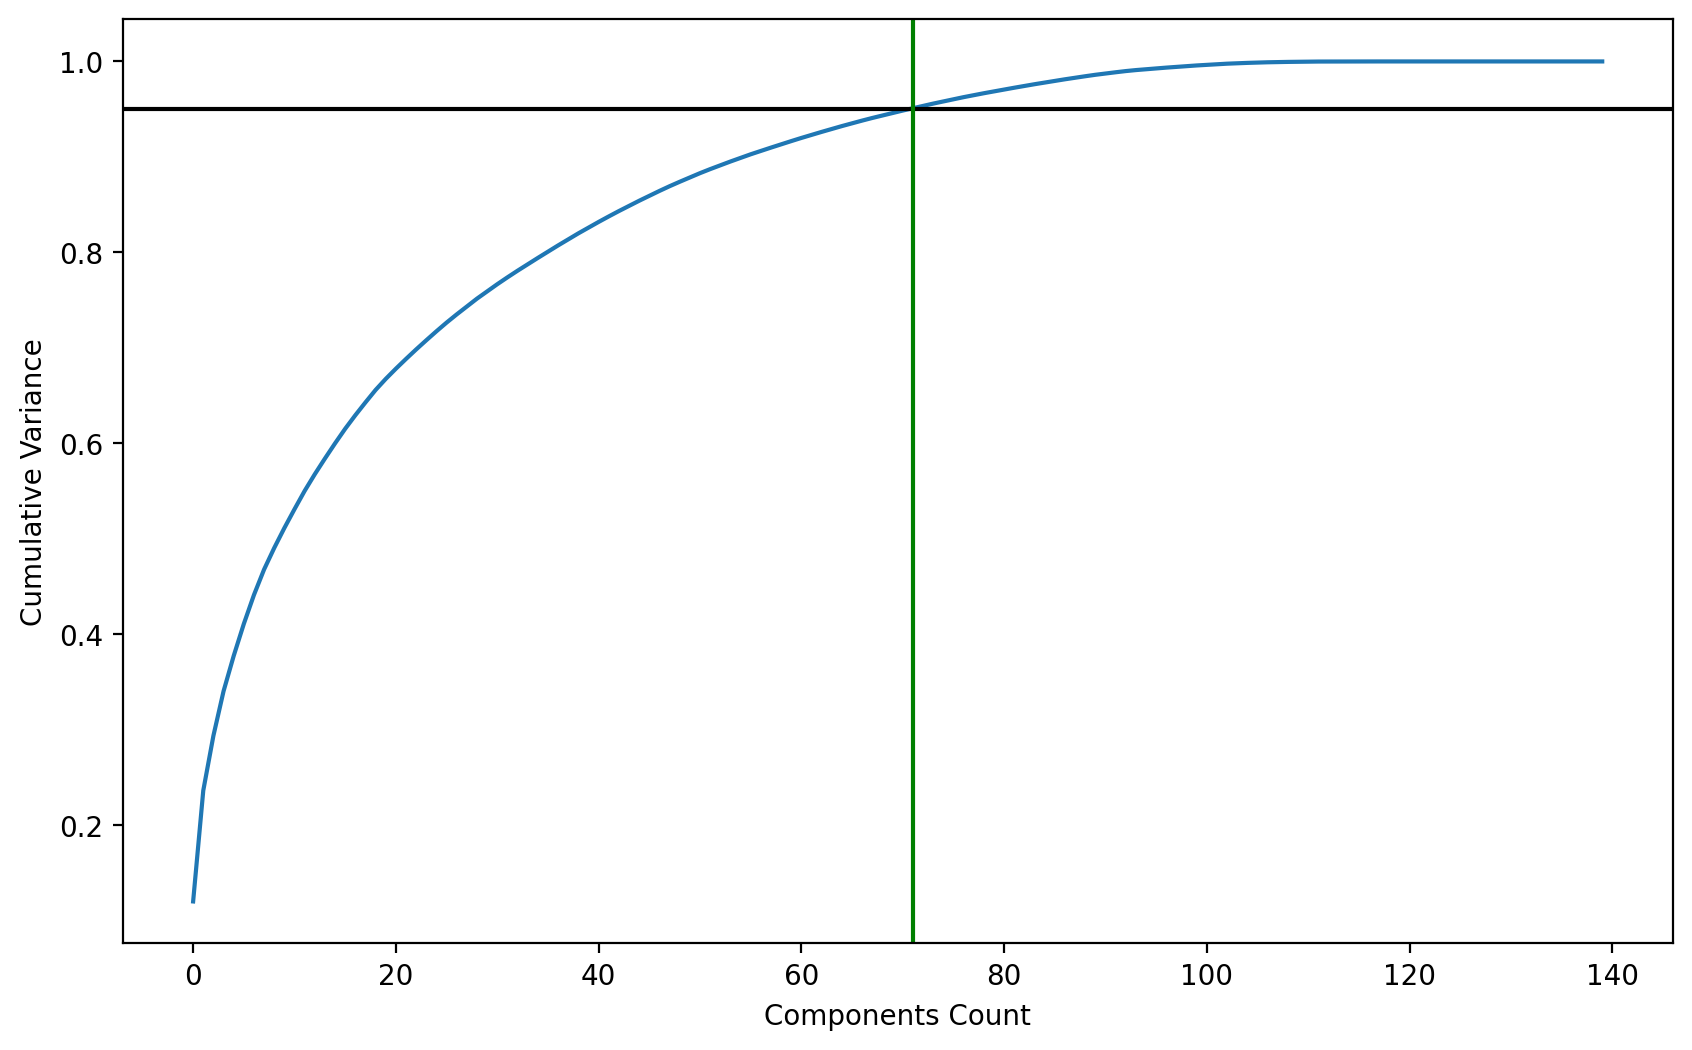

In [254]:
# Considering the cumulative variance threshold of 90%

THRESHOLD = 0.90
minimum_n = np.argwhere(variance_cumsum >= 0.90)[0][0]

fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumsum)
plt.xlabel('Components Count')
plt.ylabel('Cumulative Variance')
plt.axhline(THRESHOLD, color='k')
plt.axvline(minimum_n, color='g')

Based on the above graph, the number of components are 54, that explains 90% of the variance in the data.

In [255]:
N_COMPONENTS  = 70
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=N_COMPONENTS)
X_train_pca = pca_final.fit_transform(X_train_smp)


In [237]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [238]:
corrmat.shape

(54, 54)

#Plotting heatmap for correlation matrix

<Axes: >

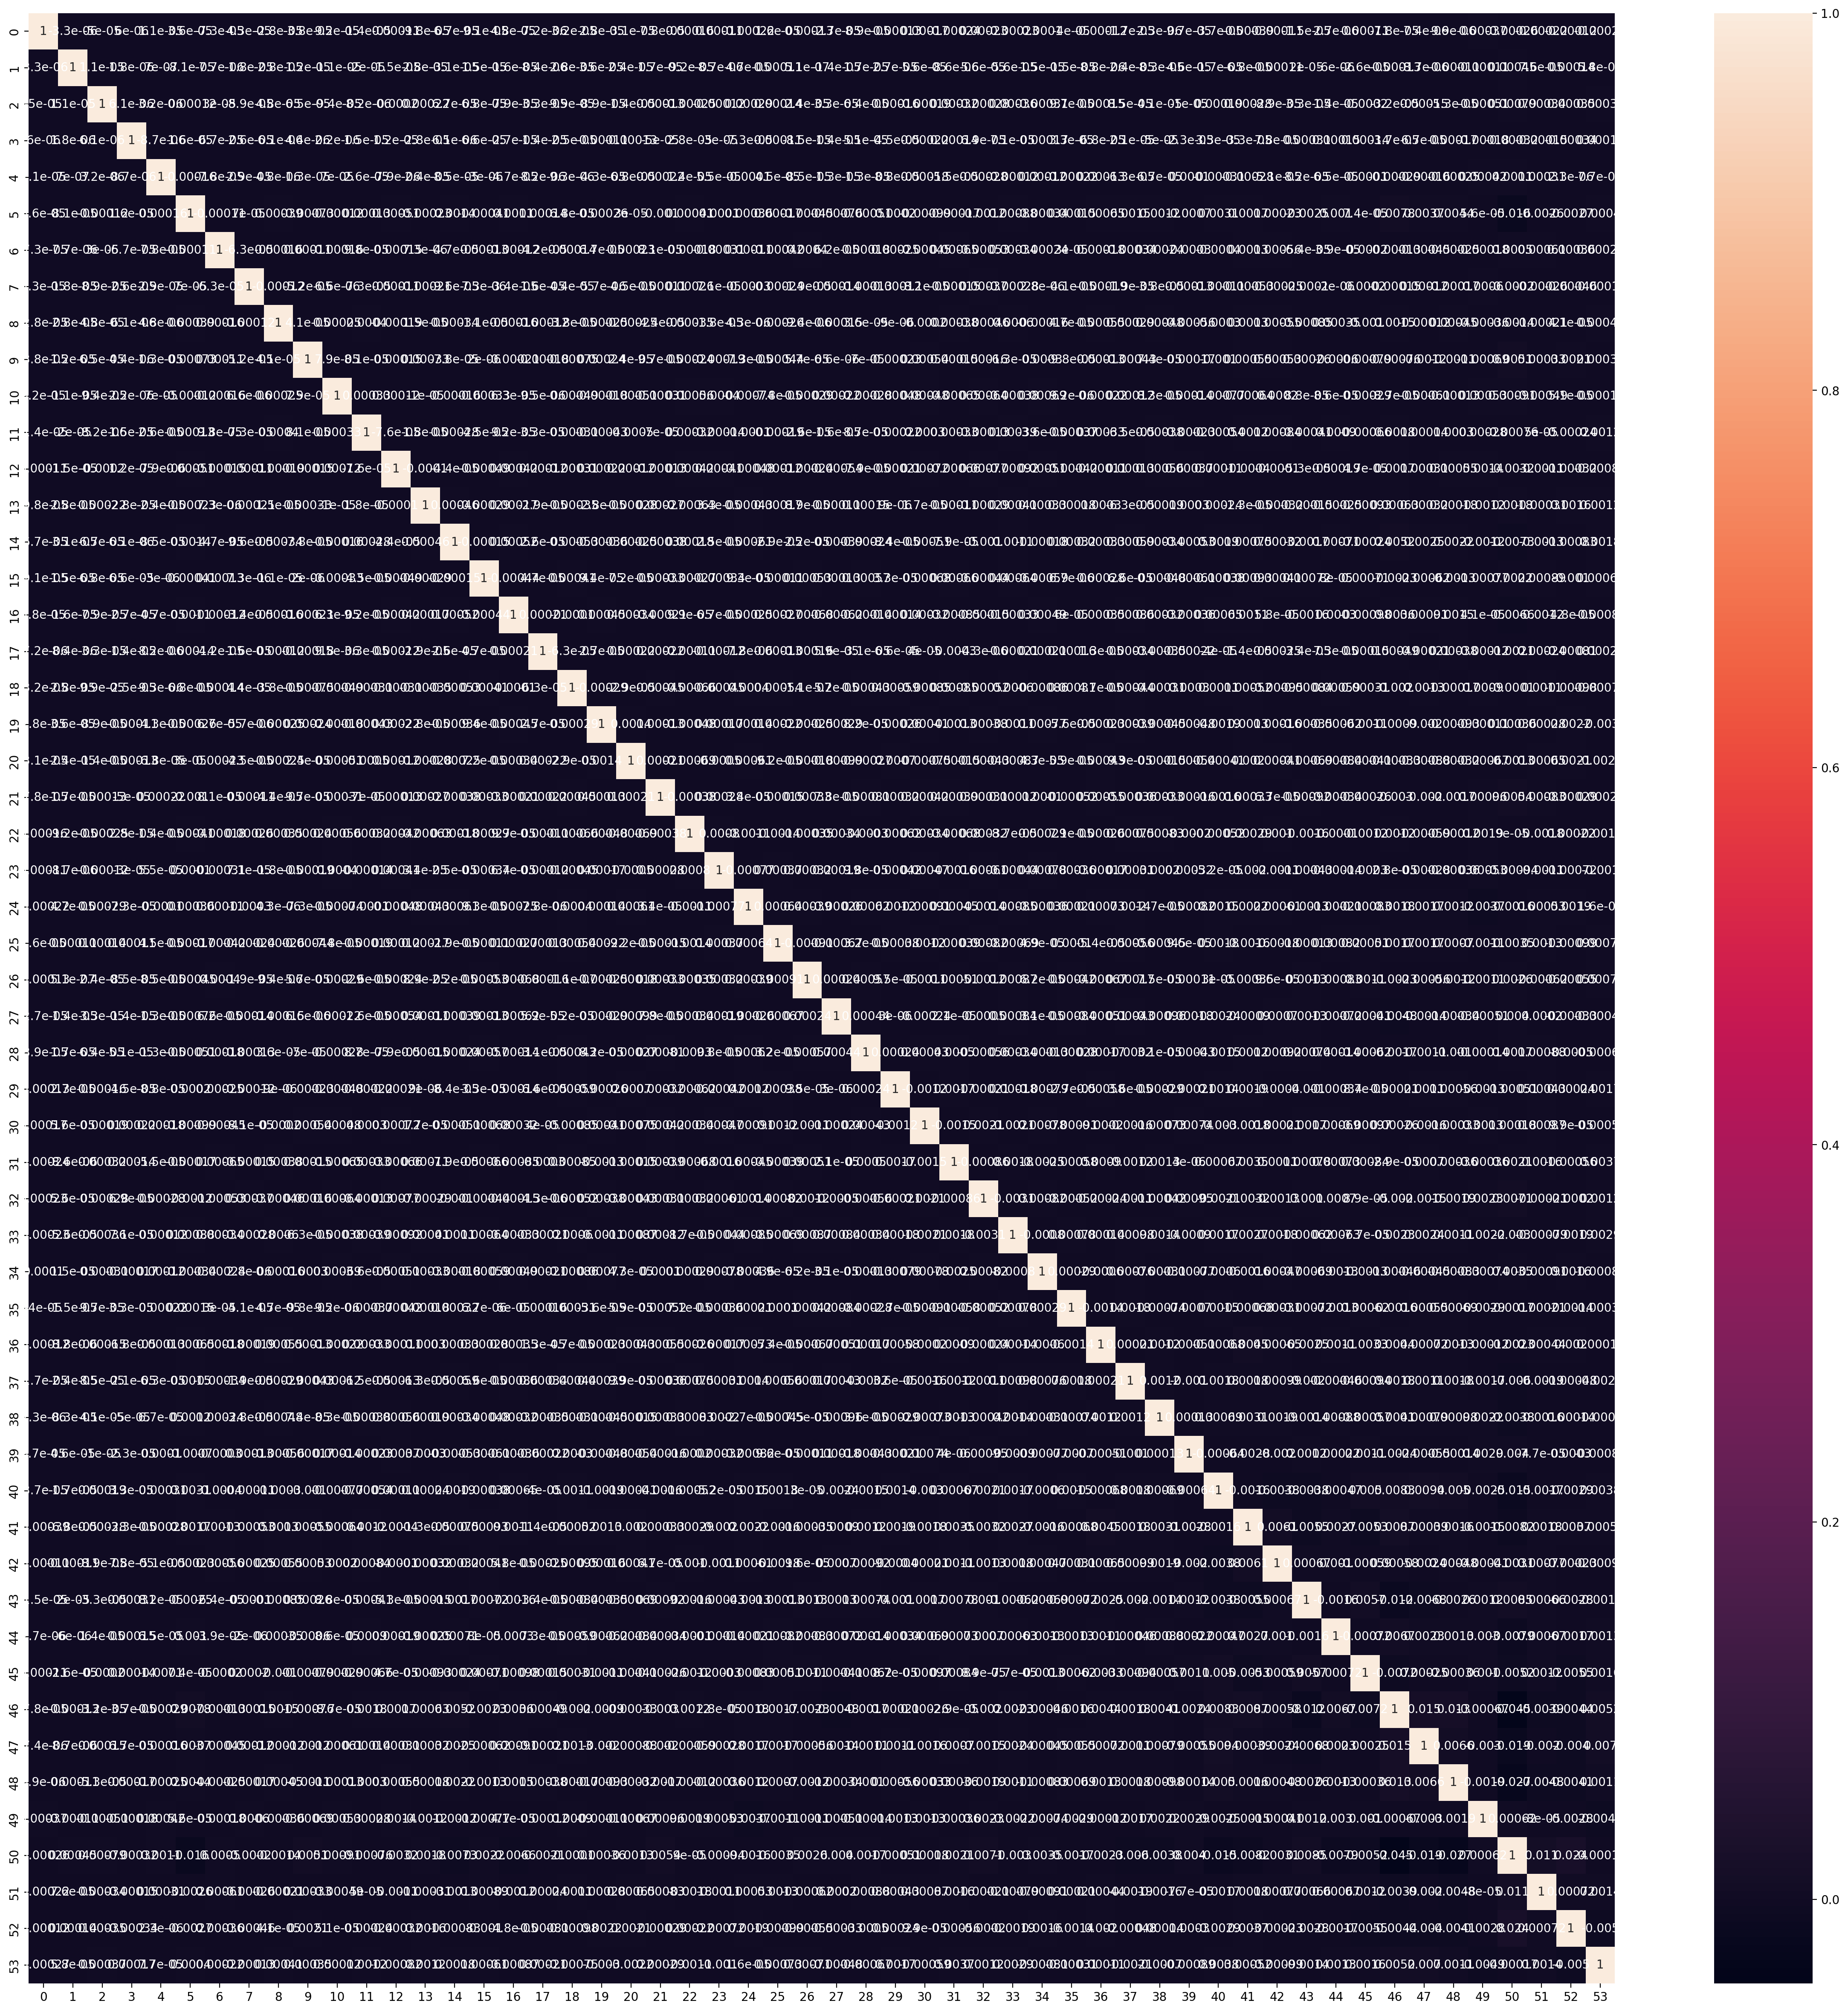

In [214]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

In [256]:
X_test_pca = pca_final.transform(X_test)

In [257]:
#Importing libraries for evaluationa nd hyperparameter tuning

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [258]:
learner_pca = LogisticRegression()

In [259]:
model_pca = learner_pca.fit(X_train_pca, y_train)

In [260]:
y_train_pred = model_pca.predict(X_train_pca)

In [249]:
y_train_pred_prob = model_pca.predict_proba(X_train_pca)[:,1]

In [261]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_train, y_train_pred))

Accuracy: 0.8394041450777202
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     19300
           1       0.82      0.87      0.84     19300

    accuracy                           0.84     38600
   macro avg       0.84      0.84      0.84     38600
weighted avg       0.84      0.84      0.84     38600



In [262]:
# Prediction on the test set
y_test_pred = model_pca.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Test: {accuracy}")

# Print classification report
print(classification_report(y_test, y_test_pred))

Accuracy Test: 0.810641627543036
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      4841
           1       0.19      0.77      0.30       271

    accuracy                           0.81      5112
   macro avg       0.59      0.79      0.60      5112
weighted avg       0.94      0.81      0.86      5112



In [220]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [227]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Hyperparameter tuning

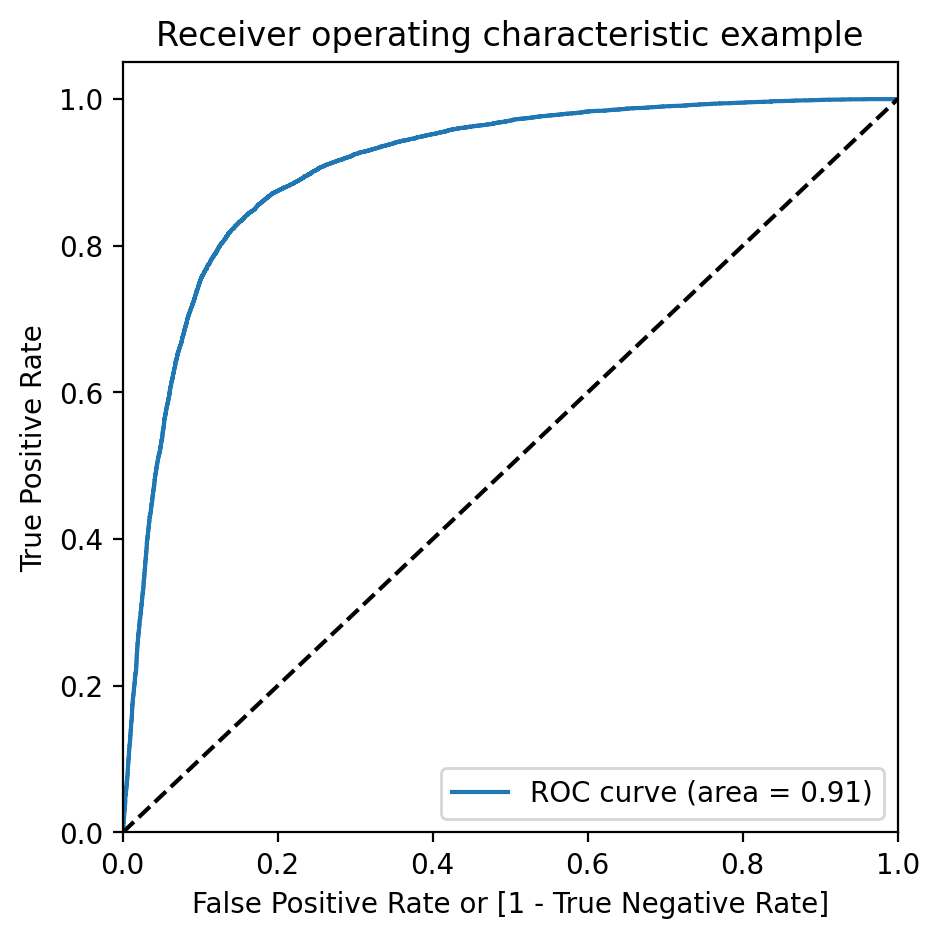

In [228]:
draw_roc(y_train, y_train_pred_prob)

## Basic model

A basic model for interpretation & insights

In [ ]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, predictions_train))
print(classification_report(y_test, predictions_test))

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
model.fit(X_train_rfe, y_train)
predictions_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, predictions_rfe)
print(f"Model Accuracy with RFE: {accuracy_rfe}")

In [ ]:
X_train.columns[rfe.support_]

In [ ]:
# Calculate the VIFs for the new model
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X, y):
    X = sm.add_constant(X) #Adding the constant
    # lm = sm.Logit(y, X).fit() # fitting the model
    lm = sm.GLM(y, X, family = sm.families.Binomial()).fit()
    return lm

def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


### removing high p-value

In [ ]:
X_train_new = X_train[X_train.columns[rfe.support_]]
lm = build_model(X_train_new, y_train)
lm.summary()

In [ ]:
# drop due to high p-value
X_train_new.drop(['total_rech_num_6'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()